In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlin inline
import string
import re
import random

import datetime as dt
from datetime import datetim

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

UsageError: Line magic function `%matplotlin` not found.


In [18]:
#Import dataset
sat = "../data/raw/Satellites.csv"
sat_df = pd.read_csv(sat)
sat_df

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),...,Dry Mass (Kilograms),Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,NaN,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,1800,9000,8/19/1997,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,NaN,3/2/2015,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0
5,ABS-4,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,1700,7400,3/13/2004,12,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184.0
6,ABS-6,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,159.00,...,1730,"6,800 (EOL)",9/26/1999,15,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924.0
7,ABS-7,South Korea,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,116.18,...,1800,4800,9/4/1999,15,Lockheed Martin Astro Space,USA,Guiana Space Center,Ariane,1999-046A,25894.0
8,USA 139,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,-14.50,...,NaN,NaN,5/9/1998,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336.0
9,USA 171,USA,National Reconnaissance Office (NRO),USA,Military,Earth Observation,Electronic Intelligence,GEO,NaN,95.40,...,NaN,NaN,9/9/2003,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937.0


In [19]:
sat_df.head(2).T

,0,1
Official Name of Satellite,AAUSat-4,ABS-2
Country/Organization of UN Registry,NR,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.
Country of Operator/Owner,Denmark,Multinational
Users,Civil,Commercial
Purpose,Earth Observation,Communications
Detailed Purpose,Automatic Identification System (AIS),NaN
Class of Orbit,LEO,GEO
Type of Orbit,Sun-Synchronous,NaN
Longitude of Geosynchronous Orbit (Degrees),0,75


In [20]:
Satellite_name = sat_df['Official Name of Satellite']
Satellite_name.value_counts().head(10)

USA 264         2
USA 238         2
USA 229         2
USA 194         2
USA 181         2
Yaogan 20B      1
USA 182         1
USA 99          1
Echostar 16     1
Sky Mexico-1    1
Name: Official Name of Satellite, dtype: int64

Text(0.5,1,'Satellite Usage')

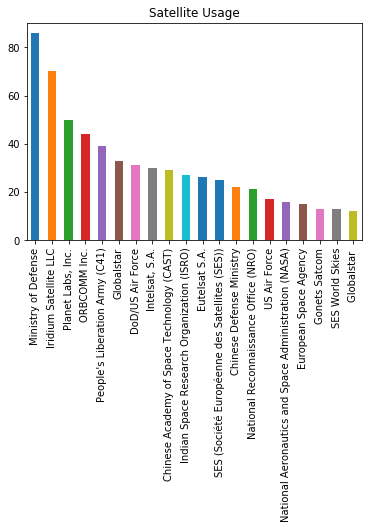

In [21]:
Owner = sat_df['Operator/Owner']
Owner.value_counts().head(20).plot(kind='bar')
plt.title('Satellite Usage')

Text(0.5,1,'Overview of satellites based on country')

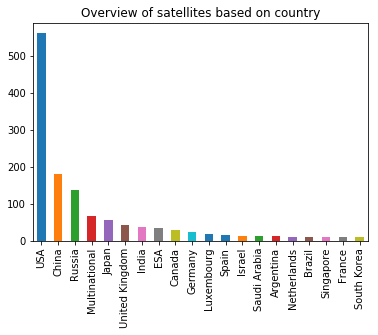

In [22]:
Country = sat_df['Country of Operator/Owner']
Country.value_counts().head(20).plot(kind='bar')
plt.title('Overview of satellites based on country')

In [25]:
satellite_purpose = sat_df['Purpose']
satellite_purpose.value_counts()

Communications                                    699
Earth Observation                                 355
Technology Development                            154
Navigation/Global Positioning                      97
Space Science                                      62
Earth Science                                       9
Navigation/Regional Positioning                     8
Communications/Technology Development               8
Technology Demonstration                            6
Earth Observation/Technology Development            5
Space Observation                                   5
Communications/Maritime Tracking                    5
Earth Observation/Communications                    2
Communications/Navigation                           1
Earth Observation/Communications/Space Science      1
Earth Observation/Research                          1
Earth/Space Science                                 1
Name: Purpose, dtype: int64

Text(0.5,1,'Overview of satellites based on country contractor')

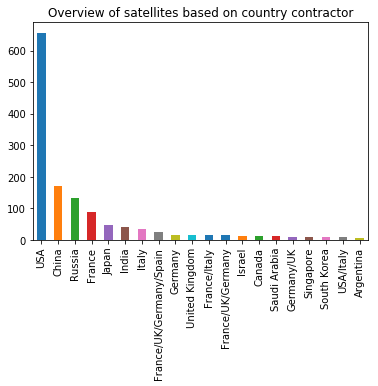

In [28]:
country_contractor = sat_df['Country of Contractor']
country_contractor.value_counts().head(20).plot(kind='bar')
plt.title('Overview of satellites based on country contractor')

Text(0.5,1,'Overview of satellites based on contractor')

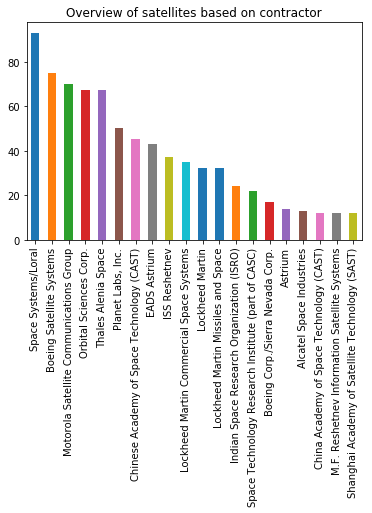

In [29]:
contractor = sat_df['Contractor']
contractor.value_counts().head(20).plot(kind='bar')
plt.title('Overview of satellites based on contractor')

Text(0.5,1,'Overview of satellites launch sites')

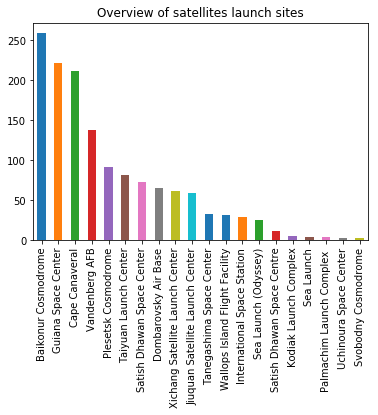

In [30]:
launch_site = sat_df['Launch Site']
launch_site.value_counts().head(20).plot(kind='bar')
plt.title('Overview of satellites launch sites')

In [31]:
sat_df.mean()

Longitude of Geosynchronous Orbit (Degrees)        5.786598
Perigee (Kilometers)                           14604.973221
Apogee (Kilometers)                            16532.527837
Eccentricity                                       0.020815
Inclination (Degrees)                             50.278703
NORAD Number                                   34574.525722
dtype: float64

In [32]:
sat_df.describe()

,Longitude of Geosynchronous Orbit (Degrees),Perigee (Kilometers),Apogee (Kilometers),Eccentricity,Inclination (Degrees),NORAD Number
count,1402.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000
mean,5.786598,14604.973221,16532.527837,0.020815,50.278703,34574.525722
std,53.973571,16550.261760,22155.693096,0.112768,41.841954,6087.083306
min,-177.120000,200.000000,322.000000,0.000000,0.000000,7530.000000
25%,0.000000,621.000000,687.000000,0.000210,0.090000,28377.000000
50%,0.000000,1357.000000,1415.000000,0.000534,54.970000,37234.000000
75%,0.000000,35770.000000,35795.000000,0.001580,97.460000,40022.000000
max,328.500000,62200.000000,330000.000000,0.957000,143.400000,41634.000000


In [33]:
pd.isnull(sat_df).any()

Official Name of Satellite                     False
Country/Organization of UN Registry            False
Operator/Owner                                  True
Country of Operator/Owner                      False
Users                                           True
Purpose                                         True
Detailed Purpose                                True
Class of Orbit                                  True
Type of Orbit                                   True
Longitude of Geosynchronous Orbit (Degrees)     True
Perigee (Kilometers)                            True
Apogee (Kilometers)                             True
Eccentricity                                    True
Inclination (Degrees)                           True
Period (Minutes)                                True
Launch Mass (Kilograms)                         True
Dry Mass (Kilograms)                            True
Power (Watts)                                   True
Date of Launch                                